In [37]:
from sklearn import datasets
import numpy as np
from sklearn.datasets import fetch_20newsgroups_vectorized
# import the required module from scikit learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split

# 1 High-Dimensional Data 
In the previous exercise sheets, you have implemented various algorithms from scratch; this exercise focuses on introducing you to a high-level Machine Learning library (sklearn).

1. Load the 20news-group-vectorized dataset from sklearn. This dataset consists of 130107 predictors with 20 classes. Perform the following experiments:

In [38]:
# dataset = datasets.load_20news_groups_vectorized()
newsgroups_train = fetch_20newsgroups_vectorized(subset='train')
newsgroups_test = fetch_20newsgroups_vectorized(subset='test')

In [39]:
type(newsgroups_train)

sklearn.utils._bunch.Bunch

In [40]:
list(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [41]:
newsgroups_train.data.shape

(11314, 130107)

In [42]:
newsgroups_train.target.shape

(11314,)

In [43]:
Xtr = newsgroups_train.data
ytr = newsgroups_train.target
Xtt = newsgroups_test.data
ytt = newsgroups_test.target

### a) Multiclass Classification

In [45]:

# Implementing classification model- using MultinomialNB

# Instantiate the estimator
clf_MNB = MultinomialNB(alpha=.01)

# Fit the model with data (aka "model training")
clf_MNB.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_MNB.predict(Xtt)
print("\nPredicted Class Labels:\t",y_pred)

# Predict the response score for a new observation
y_pred_score_mnb = clf_MNB.predict_proba(Xtt)
print("\nPredicted Score:\n",y_pred_score_mnb)

# calculate accuracy
print("\nClassification Accuracy:\t",metrics.accuracy_score(ytt, y_pred))
print("\nClassification Report:\n",metrics.classification_report(ytt, y_pred))


Predicted Class Labels:	 [11  0 11 ... 10 16  9]

Predicted Score:
 [[3.29318584e-02 6.48237592e-02 8.11140297e-02 ... 1.49467303e-02
  7.83541721e-02 1.31062176e-02]
 [9.14229957e-01 1.11428394e-03 6.33980220e-04 ... 4.13372913e-03
  1.19060686e-02 2.45859723e-02]
 [5.82604680e-05 6.41656595e-06 5.35884353e-06 ... 4.90429753e-05
  3.32329399e-04 4.55771568e-05]
 ...
 [3.53783518e-07 8.05372128e-07 5.60007939e-07 ... 7.94696025e-07
  6.14796686e-06 1.29224034e-06]
 [1.12034569e-02 3.68614885e-03 1.84572906e-03 ... 9.00457034e-02
  8.69019221e-02 3.06249837e-02]
 [1.55646243e-03 6.17712134e-04 4.83304881e-04 ... 2.04481000e-03
  4.76655894e-03 7.00257192e-04]]

Classification Accuracy:	 0.8351035581518853

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       319
           1       0.70      0.75      0.72       389
           2       0.77      0.64      0.70       394
           3       0.66      0.78      0.71

In [46]:
# Implementing classification model- using KNeighborsClassifier

# Instantiate the estimator
clf_knn =  KNeighborsClassifier(n_neighbors=5)

# Fit the model with data (aka "model training")
clf_knn.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_knn.predict(Xtt)
print("\nPredicted Class Labels:\t",y_pred)

# Predict the response score for a new observation
y_pred_score_knn = clf_knn.predict_proba(Xtt)
print("\nPredicted Score:\n",y_pred_score_knn)


# calculate accuracy
print("\nClassification Accuracy:\t",metrics.accuracy_score(ytt, y_pred))
print("\nClassification Report:\n",metrics.classification_report(ytt, y_pred))



Predicted Class Labels:	 [18 17 11 ... 10 16  0]

Predicted Score:
 [[0.2 0.  0.  ... 0.  0.4 0. ]
 [0.  0.  0.  ... 0.6 0.2 0.2]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.4]
 [0.4 0.  0.  ... 0.  0.  0. ]]

Classification Accuracy:	 0.40839086563993626

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.55      0.27       319
           1       0.36      0.34      0.35       389
           2       0.46      0.31      0.37       394
           3       0.47      0.35      0.40       392
           4       0.51      0.24      0.33       385
           5       0.40      0.49      0.44       395
           6       0.75      0.43      0.55       390
           7       0.52      0.36      0.43       396
           8       0.75      0.53      0.62       398
           9       0.63      0.34      0.44       397
          10       0.74      0.49      0.59       399
          11      


 Train accuracy score	: 99.99%

 Test accuracy score	: 77.71%


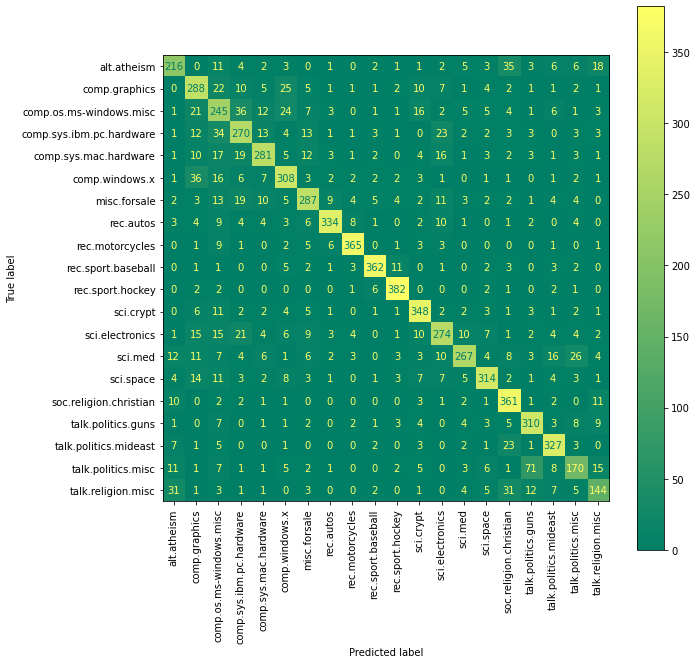

In [47]:
# STANDARDIZING THE DATA
lr_clf = make_pipeline(StandardScaler(with_mean=False), LogisticRegression())
# lr_clf = LogisticRegression()
lr_clf.fit(Xtr, ytr)
lr_pred = lr_clf.predict(Xtr)
train_score = accuracy_score(ytr,lr_pred) * 100
print("\n",f"Train accuracy score\t: {train_score:.2f}%")
lr_pred = lr_clf.predict(Xtt.toarray())
test_score = accuracy_score(ytt, lr_pred) * 100
print("\n",f"Test accuracy score\t: {test_score:.2f}%")
cm = confusion_matrix(ytt, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=newsgroups_train.target_names)


# Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

## b) Use Logistic Regression Algorithm and perform
### i) One vs Rest

In [15]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(lr_clf)
ovr.fit(Xtr, ytr)
ovr_pred = ovr.predict(Xtr)
train_score = accuracy_score(ytr,ovr_pred) * 100
print(f"Train accuracy score:\t {train_score:.2f}%")

ovr_pred = ovr.predict(Xtt.toarray())
test_score = accuracy_score(ytt, ovr_pred) * 100
print(f"Test accuracy score:\t {test_score:.2f}%")

Train accuracy score: 88.86%
Test accuracy score: 72.65%


### ii) One vs One

In [16]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(lr_clf)
ovo.fit(Xtr, ytr)
ovo_pred = ovo.predict(Xtr)
train_score = accuracy_score(ytr,ovo_pred) * 100
print(f"Train accuracy score:\t {train_score:.2f}%")

ovo_pred = ovo.predict(Xtt.toarray())
test_score = accuracy_score(ytt, ovo_pred) * 100
print(f"Test accuracy score:\t {test_score:.2f}%")

Train accuracy score: 84.13%
Test accuracy score: 64.60%


## c) Use Linear Discriminant Analysis Algorithm and perform

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
# This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).
ss = TruncatedSVD(n_components=1500)
model = ss.fit(Xtr)
xtr = model.transform(Xtr)
xtt = model.transform(Xtt)

## One vs Rest

In [35]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', tol='1.0e-2')
model = OneVsRestClassifier(lda)
model.fit(xtr, ytr)
y_pred = model.predict(xtr)
train_score = accuracy_score(ytr,y_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")
pred = model.predict(xtt)
test_score = accuracy_score(ytt,pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")


Train accuracy score: 95.84%
Test accuracy score: 79.82%


## One vs One

In [36]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', tol='1.0e-2')
model = OneVsRestClassifier(lda)
model.fit(xtr, ytr)
pred = model.predict(xtr)
train_score = accuracy_score(ytr,pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

pred = model.predict(xtt)
test_score = accuracy_score(ytt, pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 95.84%
Test accuracy score: 79.82%


Accuracy in each of the above cases is more than 55%.